# Finding the optimal policy

Let's try to find the optimal policy using Poicy iteration an Value iteration in a simple grid world.

The world and the optimal policy to be gound are the following:

<img src="http://www.cs.upc.edu/~mmartin/Grid+world.jpg" width="350">

Next we have the implementation of the gridworld (see previous notebook for explanations).

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Define the state matrix
state_matrix = np.zeros((3,4))
state_matrix[0, 3] = 1
state_matrix[1, 3] = 1
state_matrix[1, 1] = -1

#Define the reward matrix
reward_matrix = np.full((3,4), -0.04)
reward_matrix[0, 3] = 1
reward_matrix[1, 3] = -1

transition_matrix = np.array([[0.8, 0.1, 0.0, 0.1],
                              [0.1, 0.8, 0.1, 0.0],
                              [0.0, 0.1, 0.8, 0.1],
                              [0.1, 0.0, 0.1, 0.8]])

gamma = 0.999

def prob_next_state(position,world_row=3,world_col=4):
    "Given a position in the grid-world, returns a list of possible next states"
    posible=[]
    for action in range(4):
        position_def = position
        if(action == 0): new_position = (position[0]-1, position[1])   #UP
        elif(action == 1): new_position = (position[0], position[1]+1) #RIGHT
        elif(action == 2): new_position = (position[0]+1, position[1]) #DOWN
        elif(action == 3): new_position = (position[0], position[1]-1) #LEFT
        else: raise ValueError('The action is not included in the action space.')

        #Check if the new position is a valid position
        if (new_position[0]>=0 and new_position[0]<world_row):
            if(new_position[1]>=0 and new_position[1]<world_col):
                if(state_matrix[new_position[0], new_position[1]] != -1):
                    position_def = new_position
        posible.append(position_def)
    return posible

Now, we refactor the policy evaluation procedure using Bellman equations that we used in the previous notebook. Notice we have two optional parameters. V is when we want to continue to use a previous V valuation of states, and randomp to determine the proportion of states that will be updated by the function:

In [3]:
def policy_evaluation(policy_matrix, numiter, V = np.zeros((3,4)),randomp=1 ):
    for k in range(numiter):
        state = np.nditer(state_matrix, flags=['multi_index'])
        #old_V = V.copy()
        while not state.finished:
            action = policy_matrix[state.multi_index]
            if state[0]==0 and random.random() < randomp:
                acum=0
                for x in zip(prob_next_state(state.multi_index,3,4),transition_matrix[int(action),:]):
                    acum = acum + x[1]*(reward_matrix[x[0]]+gamma*V[x[0]])
                V[state.multi_index] = acum
            state.iternext()
    return V

Auxiliar function to pretty print the policy

In [4]:
def print_policy(policy_matrix2, V=np.array([]),lstates=[]):
    policy_matrix = policy_matrix2[::-1]
    shape = policy_matrix.shape
    U=np.zeros(policy_matrix.shape)
    R=np.zeros(policy_matrix.shape)
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(policy_matrix[row,col] == -1): 
                U[row,col]=0    
                R[row,col]=0  
            elif(policy_matrix[row,col] == 0): 
                U[row,col]=0    
                R[row,col]=1 
                #policy_string += " ^  "
            elif(policy_matrix[row,col] == 1): 
                U[row,col]=1   
                R[row,col]=0 
                #policy_string += " >  "
            elif(policy_matrix[row,col] == 2): 
                U[row,col]=0    
                R[row,col]=-1 
                #policy_string += " v  "           
            elif(policy_matrix[row,col] == 3):
                U[row,col]=-1   
                R[row,col]=0                 
                #policy_string += " <  "
            elif(np.isnan(policy_matrix[row,col])): 
                U[row,col]=0    
                R[row,col]=0  
                #policy_string += " #  "
    plt.rcParams['figure.figsize'] = (4,3)
    if V.size==0:
        V=np.ones(policy_matrix.shape)
        for x in lstates:
            V[x.multi_index]=0.7
        plt.matshow(V,extent=[0, 4, 0, 3],vmin=0, vmax=1)
    else:
        plt.matshow(V,extent=[0, 4, 0, 3])
    plt.grid()
    X, Y = np.meshgrid(np.arange(0.5, 4.5, 1), np.arange(0.5, 3.5, 1))
    Q = plt.quiver(X, Y,U,R)

    plt.show()


In [5]:
def return_expected_action(state):
    """Return the expected action.
    """
    lV=[]
    for action in range(0,4):
        acum=0
        for x in zip(prob_next_state(state.multi_index,3,4),transition_matrix[int(action),:]):
            acum = acum + x[1]*(reward_matrix[x[0]]+gamma*V[x[0]])
        lV.append(acum)
    return np.argmax(lV)

## Policy iteration algorithm

Initial policy:


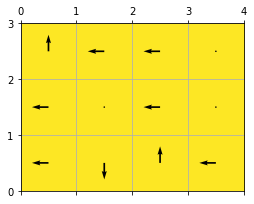

Update!


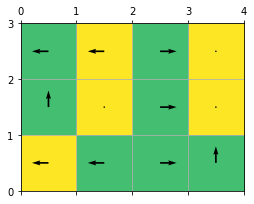

Update!


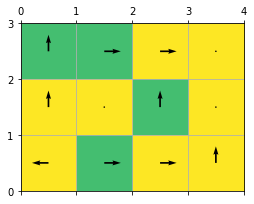

Update!


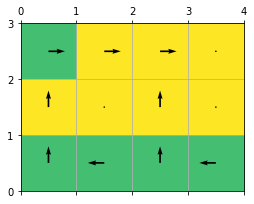

Update!


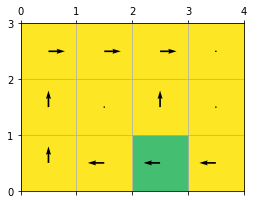

In [6]:
# Start with random policy
policy_matrix = np.zeros((3,4))
state = np.nditer(state_matrix, flags=['multi_index'])
while not state.finished:
    policy_matrix[state.multi_index] = np.random.choice(4, 1)
    state.iternext()
policy_matrix[0,3]=-1
policy_matrix[1,3]=-1
policy_matrix[1,1]=np.nan
print('Initial policy:')
print_policy(policy_matrix)


# Enter the loop
unchanged = False
while not unchanged:
    unchanged = True
    # Policy evaluation step
    V=policy_evaluation(policy_matrix, 100)
    
    # Policy improvement
    state = np.nditer(state_matrix, flags=['multi_index'])
    lchanged_states=[]
    while not state.finished:
        if state[0]==0:
            action=return_expected_action(state)
            if policy_matrix[state.multi_index]!=action:
                unchanged = False
                lchanged_states.append(state.copy())
                policy_matrix[state.multi_index]=action
        state.iternext()
        
    if not unchanged:
        print('Update!')
        print_policy(policy_matrix,lstates=lchanged_states)


### Policy iteration without complete convergence of policy evaluation

Initial policy:


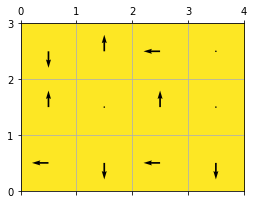

Update in iteration 1 !


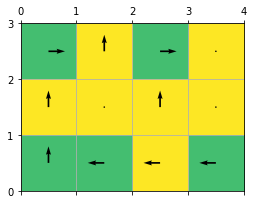

Update in iteration 2 !


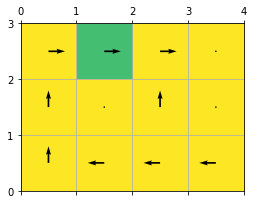

Update in iteration 3 !


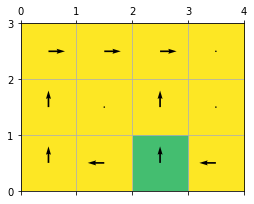

Update in iteration 6 !


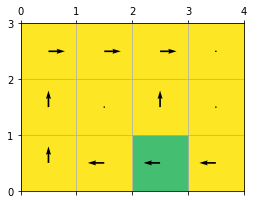

In [7]:
# Start with random policy
state = np.nditer(state_matrix, flags=['multi_index'])
while not state.finished:
    policy_matrix[state.multi_index] = np.random.choice(4, 1)
    state.iternext()
policy_matrix[0,3]=-1
policy_matrix[1,3]=-1
policy_matrix[1,1]=np.nan    
print('Initial policy:')
print_policy(policy_matrix)

unchanged = False                              
for k in range(1000):              # <<------ Now we cannot stop after no change in policy
    unchanged = True
    # Policy evaluation
    V=policy_evaluation(policy_matrix, 1, V)   # <<------ Only 1 swap. Reuse V. 
    
    # Policy improvement
    state = np.nditer(state_matrix, flags=['multi_index'])
    lchanged_states=[]
    while not state.finished:
        if state[0]==0:
            action=return_expected_action(state)
            if policy_matrix[state.multi_index]!=action:
                unchanged = False
                lchanged_states.append(state.copy())
                policy_matrix[state.multi_index]=action
        state.iternext()
        
    if not unchanged:
        print('Update in iteration',k+1,'!')
        print_policy(policy_matrix,lstates=lchanged_states)

### Policy iteration without complete sweeps of policy inprovement

Initial policy:


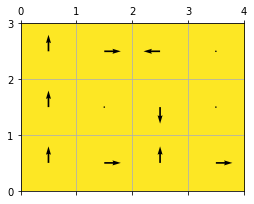

Update in iteration 1 !


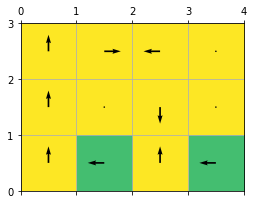

Update in iteration 2 !


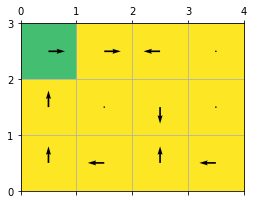

Update in iteration 3 !


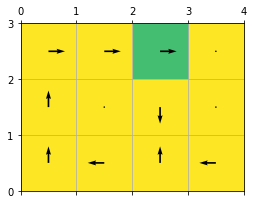

Update in iteration 8 !


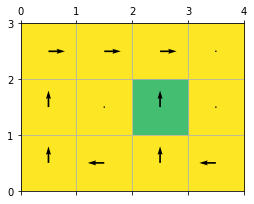

Update in iteration 9 !


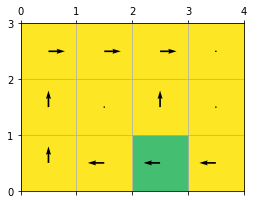

Update in iteration 14 !


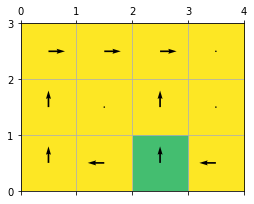

Update in iteration 16 !


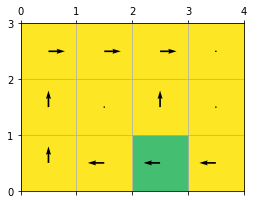

In [8]:
prob_state=1/9
# Start with random policy
state = np.nditer(state_matrix, flags=['multi_index'])
while not state.finished:
    policy_matrix[state.multi_index] = np.random.choice(4, 1)
    state.iternext()
policy_matrix[0,3]=-1
policy_matrix[1,3]=-1
policy_matrix[1,1]=np.nan    
print('Initial policy:')
print_policy(policy_matrix)


unchanged = False
for k in range(1000):
    unchanged = True
    # Policy evaluation
    V=policy_evaluation(policy_matrix, 1, V)
    
    # Policy improvement
    state = np.nditer(state_matrix, flags=['multi_index'])
    
    lchanged_states=[]
    while not state.finished:
        if state[0]==0 and random.random() < prob_state:   # <<---- Update only some states. 
            action=return_expected_action(state)
            if policy_matrix[state.multi_index]!=action:
                unchanged = False
                lchanged_states.append(state.copy())
                policy_matrix[state.multi_index]=action
        state.iternext()
        
    if not unchanged:
        print('Update in iteration',k+1,'!')
        print_policy(policy_matrix,lstates=lchanged_states)    


### Policy iteration without complete sweeps in any loop

Initial policy:


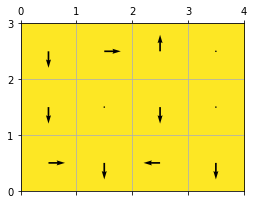

Update in iteration 1 !


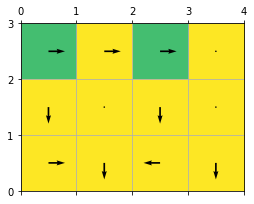

Update in iteration 2 !


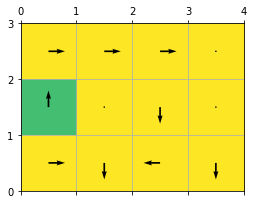

Update in iteration 3 !


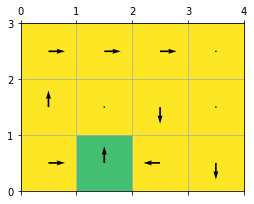

Update in iteration 5 !


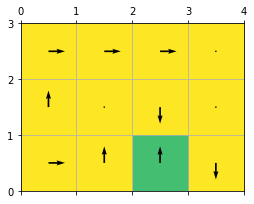

Update in iteration 6 !


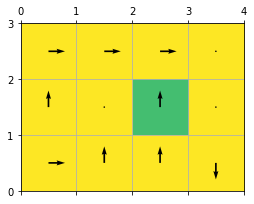

Update in iteration 8 !


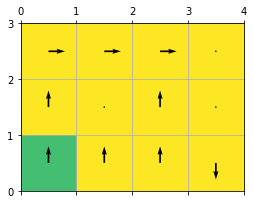

Update in iteration 10 !


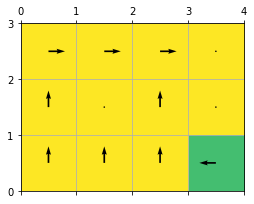

Update in iteration 17 !


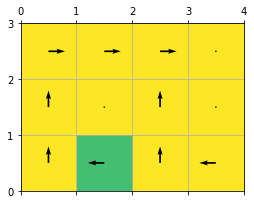

Update in iteration 20 !


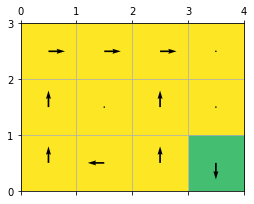

Update in iteration 26 !


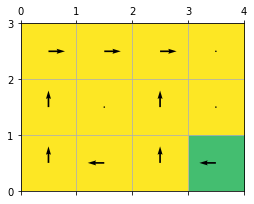

Update in iteration 41 !


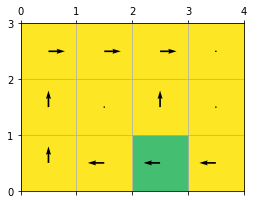


 Value function:
 [[ 0.84881226  0.90630541  0.95748948  0.        ]
 [ 0.797764    0.          0.69906187  0.        ]
 [ 0.7404234   0.6895106   0.64536512  0.42192624]]


In [9]:
# Start with random policy
state = np.nditer(state_matrix, flags=['multi_index'])
while not state.finished:
    policy_matrix[state.multi_index] = np.random.choice(4, 1)
    state.iternext()
policy_matrix[0,3]=-1
policy_matrix[1,3]=-1
policy_matrix[1,1]=np.nan    
print('Initial policy:')
print_policy(policy_matrix)

unchanged = False
for k in range(10000):
    unchanged = True
    # Policy evaluation
    V=policy_evaluation(policy_matrix, 1, V, randomp=1/9) # <<---- Update only some states.
    
    # Policy improvement
    state = np.nditer(state_matrix, flags=['multi_index'])


    lchanged_states=[]
    while not state.finished:
        if state[0]==0 and random.random() < prob_state:   # <<---- Update only some states. 
            action=return_expected_action(state)
            if policy_matrix[state.multi_index]!=action:
                unchanged = False
                lchanged_states.append(state.copy())
                policy_matrix[state.multi_index]=action
        state.iternext()
        
    if not unchanged:
        print('Update in iteration',k+1,'!')
        print_policy(policy_matrix,lstates=lchanged_states)            
        
print('\n Value function:\n',V)

## Value iteration

[[ 0.84881226  0.90630541  0.95748948  0.        ]
 [ 0.797764    0.          0.69906187  0.        ]
 [ 0.7404234   0.6895106   0.64536512  0.42192624]]


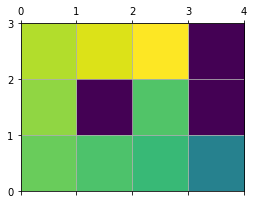

In [10]:
# Value iteration

V = np.zeros((3,4))
for k in range(100):
    unchanged = True

    state = np.nditer(state_matrix, flags=['multi_index'])
    while not state.finished:
        if state[0]==0:
            lV=[]
            for action in range(0,4):
                acum=0
                for x in zip(prob_next_state(state.multi_index,3,4),transition_matrix[int(action),:]):
                    acum = acum + x[1]*(reward_matrix[x[0]]+gamma*V[x[0]])
                lV.append(acum)
            V[state.multi_index]=max(lV)
        state.iternext()
        
print(V)
plt.matshow(V,extent=[0, 4, 0, 3])
plt.grid()
plt.show()

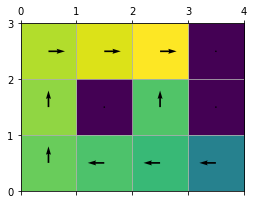

In [11]:
state = np.nditer(state_matrix, flags=['multi_index'])
while not state.finished:
    if state[0]==0:
        lV=[]
        for action in range(0,4):
            acum=0
            for x in zip(prob_next_state(state.multi_index,3,4),transition_matrix[int(action),:]):
                acum = acum + x[1]*(reward_matrix[x[0]]+gamma*V[x[0]])
            lV.append(acum)
        policy_matrix[state.multi_index]=np.argmax(lV)
    state.iternext()
    
print_policy(policy_matrix,V)

Try to predict optimal policy with these changes.

1. Change penalty to -0,8 per step

2. Try deterministic transitions

3. Try the following transition matrix:

transition_matrix = np.array([[0.8, 0.1, 0.0, 0.1],
                              [0.1, 0.8, 0.1, 0.0],
                              [0.0, 0.1, 0.8, 0.1],
                              [0.0, 0.0, 0.5, 0.5]])
                          
